**Bernardo José Llamas Verna (47286447B)**

# Análisis de la Demanda Eléctrica en España (2014-2021)

## 0) Introducción

Debido a las convulsiones del mercado eléctrico español en los últimos años con alta variabilidad de los precios, crecimientos históricos de los precios y el debate en torno a una transición ecológica, la motivación del presente trabajo es la de analizar el consumo de energía en el Estado Español para el período 2014-2021.

Se comenzará realizando un análisis global del consumo identificando posibles tendencias y estacionalidades para luego ir pasando a un enfoque más granular (meses en los que se concentran los picos y valles de consumo, afectan o no los días de la semana, festivos y variables exógenas como la temperatura. A continuación se estudiarán diferentes modelos de predicción (forecasting) para poder predecir consumos a futuro.

## 1) Extracción de los datos

Los datos de demanda energética que se van a emplear en el presente trabajo han sido extraídos de la API E-SIOS de Red Eléctrica, permitiendo obtener los datos de forma cómoda con diferentes intervalos de tiempo (horario, diario, mensual, anual, etc).

El proceso de extracción, limpieza y preparación están explicados en el notebook `Extraccion_Datos_Demanda Electrica.ipynb`.

In [1]:
# TODO: hacer un notebook resumen de cómo extraemos los datos de Demanda Eléctrica.

## 2) Análisis Exploratorio de datos

### Análisis Mensual

Vamos a comenzar realizando una primera aproximación de los datos a través del dataset de demanda mensual. Para ello cargamos los datos:

In [2]:
import requests
import json
import numpy as np
import datetime
import string
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
energy_demand_monthly = pd.read_csv('demanda_electrica_month.csv')

In [4]:
energy_demand_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    96 non-null     object 
 1   value   96 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


Tenemos 96 registros no nulos en 2 columnas: `date` y `value`. Los valores serían del estilo:

In [5]:
energy_demand_monthly.head()

,date,value
0,2014-01-01,132056990.0
1,2014-02-01,121688438.0
2,2014-03-01,124724746.0
3,2014-04-01,112057243.0
4,2014-05-01,116035410.0


Las unidades de la columna `value` son `Mwh`.

Ahora vamos a pasar a representar nuestros datos, pero antes convertimos `date` en índice:

In [6]:
energy_demand_monthly.set_index("date", inplace=True)
energy_demand_monthly.head(2)

,value
date,
2014-01-01,132056990.0
2014-02-01,121688438.0


In [39]:
energy_demand_monthly.index.freq

'MS'

In [7]:
energy_demand_monthly.index.freq='MS'
energy_demand_monthly.index

Index(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01', '2014-05-01',
       '2014-06-01', '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
       '2014-11-01', '2014-12-01', '2015-01-01', '2015-02-01', '2015-03-01',
       '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
       '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01', '2016-01-01',
       '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01',
       '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01',
       '2016-12-01', '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
       '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01',
       '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
       '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
       '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
       '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01',

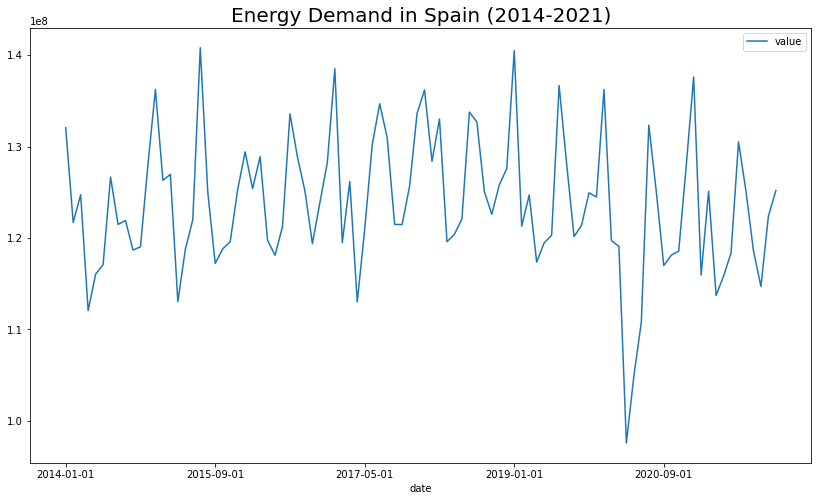

In [8]:
energy_demand_monthly.plot(figsize=(14,8))
plt.title("Energy Demand in Spain (2014-2021)", size = 20)
plt.show()

Podemos ver en esta representación cómo la demanda de energía oscila de forma periódica a lo largo del tiempo con unos máximos y mínimos dentro de un margen bien definido entre (1.1-1.4)*10^8 Mwh, excepto en 2020 donde vemos una caída abrupta que coincide con la irrupción del COVID-19 en España y el inicio del confinamiento estricto que duró casi 3 meses. Después podemos ver cómo remonta la demanda de energía coincidiendo con la vuelta a cierta normalidad. 

Podemos intuir que el pico máximo cada año se produce a principios de año y en los meses de verano debido a la mayor necesidad de energía en los hogares para calefacción o aire acondicionado. Por otra parte, los meses de menor consumo son los correspondientes a los meses de primaver y otoño.

Vamos a ver cómo se distribuye la demanda de energía por año y mes en el intervalo de tiempo que tratamos. La demanda por año nos permite ver una tendencia a lo largo del tiempo, mientras que la demanda por mes nos permite ver si hay estacionalidad.

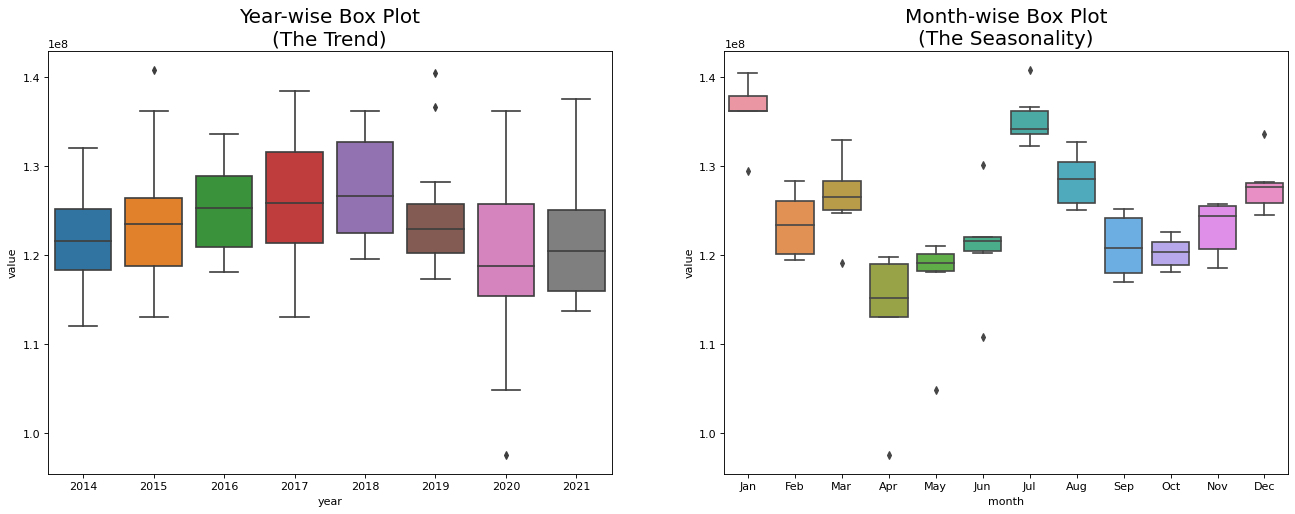

In [9]:
import matplotlib as mpl
import seaborn as sns

# Import Data
df = pd.read_csv('demanda_electrica_month.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([2014, 2021]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

En el primer gráfico, podemos ver cómo la media de la demanda de energía cada año sube hasta llegar al año 2018, a partir del cual se produce un descenso bastante notable en 2019 para caer aún más en 2020 y volver a remontar en 2021, aunque todavía bastante por debajo de 2018 y los años anteriores.

En el segundo gráfico confirmamos lo que habíamos dicho antes: los mayores consumos se producen en los meses de invierno (diciembre-marzo) y verano (julio-agosto), mientras que los de menor consumo se corresponden con los meses de primavera (abril-junio) y otoño (septiembre-noviembre).

In [10]:
# TODO: repetir los gráficos excluyendo 2020-2021 por ser años anómalos para ver cómo afecta a la estacionalidad ?¿

# TODO: poner conclusiones de tipo social o climático en los años? 
## (posible reducción de consumo por carestía de la vida o años de temperaturas más suaves)?¿

Vamos a ver una comparativa de la demanda energética por año de forma superpuesta.

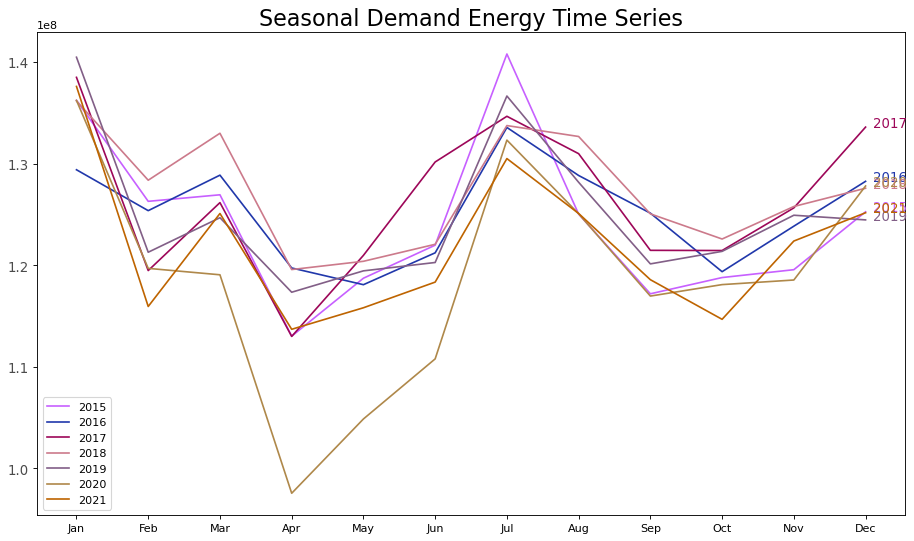

In [11]:
# Import Data
df = pd.read_csv('demanda_electrica_month.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(14, 8), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Demand Energy Time Series", fontsize=20)
plt.legend()
plt.show()

Podemos ver a nivel general cómo cada año se repiten los patrones de demanda de energía en los mismos meses.

Destaca 2015 con el máximo valor registrado en la serie en el mes de julio, mientras que el valor mínimo aparece en abril de 2020.

En 2017 podemos ver cómo una vez alcanzado el mínimo en abril, la demanda de energía crece de forma rápida manteniendo valores muy cercanos en los meses de junio, julio y agosto, lo que nos puede indicar que fue un año bastante caluroso y no solo en julio, como viene siendo habitual en el resto de años. En ese aspecto, también destaca 2018 por tener un consumo muy parecido entre julio y agosto.

La tendencia y estacionalidad que hemos analizado antes podemos obtener conclusiones parecidas descomponiendo la señal en sus 3 componentes: tendencia, estacionalidad y ruido.

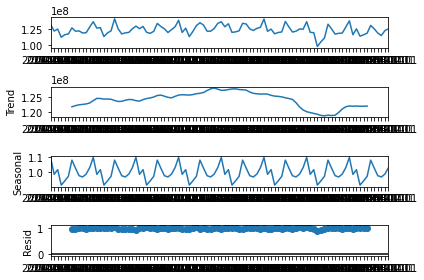

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(energy_demand_monthly, model='multiplicative', period=12)
result.plot()
plt.show()

In [40]:
# TODO: mejorar la presentación poniendo la frecuencia como MonthBegin

In [ ]:
# TODO: comentario sobre residuos?

A continuación vamos a ver si nuestra serie es estacionaria o no, es decir, si su media y varianza no están en función del tiempo. La estacionariedad es importante porque la mayoría de métodos estadísticos para realizar análisis y predicciones se basan en la suposición de que las propiedades estadísticas de la serie (media, varianza, correlación, etc.) son constantes en el tiempo. Para comprobarlo vamos a usar el test de Dickey-Fuller que establece como hipótesis nula (H0) que la serie es estacionaria.

In [50]:
def adfuller_test(data):
    from statsmodels.tsa.stattools import adfuller
    
    result = adfuller(data)
    labels =['ADF Tesr Statistic','p-value','Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+": "+str(value))
    if result[1] <= 0.05:
        print("Conclusion: strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Conclusion: weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [51]:
adfuller_test(energy_demand_monthly)

ADF Tesr Statistic: -1.34347257117945
p-value: 0.6090564874005809
Lags Used: 12
Number of Observations Used: 83
Conclusion: weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


Por lo tanto, podemos ver cómo nuestra serie no es estacionaria.

In [53]:
# TODO: implementar técnicas de suavizado para ver con cuál se convierte en estacionaria 
# aunque usemos los datos "en crudo" en nuestro modelo?

Antes de construir los modelos necesitamos saber cómo se correlacionan los datos entre sí mediante las funciones de autocorrelación (ACF) y las funciones de autocorrelación parcial (PACF). Los análisis de autocorrelación ayudan a detectar patrones ocultos y estacionalidad, así como buscar aleatoriedad.

ACF mide y dibuja la correlación promedio entre los datos de una serie temporal y sus valores previos para diferentes valores de retrasos (lags). Una PACF es similar a una ACF excepto que cada correlación parcial controla para alguna correlación entre las observaciones para longitudes de retrasos más cortas.

Gracias a ACF podemos responder las siguientes preguntas:
* ¿es nuestra serie temporal ruido blanco o random?
* ¿una observación está relacionada con su adyacente?...¿y la siguiente? ¿y la siguiente?
* ¿la serie temporal se puede describir con un modelo MA? ¿de qué orden?

Mientras que PACF:
* ¿la serie temporal se puede modelar con un modelo AR? ¿de qué orden?

Por lo tanto, el valor de un ACF y PACF en el primer retraso es igual porque ambos miden la correlación entre datos en un tiempo t con puntos atrasados un tiempo t-1. Sin embargo, en el segundo retraso, la ACF mide la correlación entre los puntos en un instante t con los puntos en un instante t-2, mientras que PACF mide la misma correlación, pero después de controlar la correlación entre los puntos en un instante t con los que están en t-1.

Gracias a ACF y PACF podemos entender la dinámica temporal de una serie temporal individual.

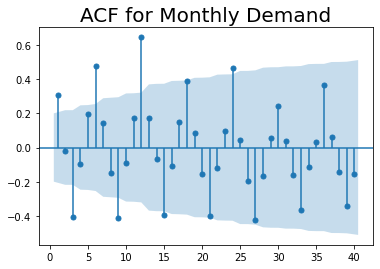

In [54]:
import statsmodels.graphics.tsaplots as sgt

sgt.plot_acf(energy_demand_monthly, zero = False, lags = 40)
plt.title("ACF for Monthly Demand", size = 20)
plt.show()

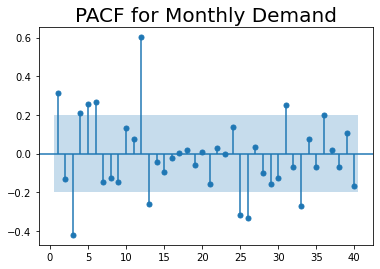

In [55]:
sgt.plot_pacf(energy_demand_monthly, zero = False, lags = 40)
plt.title("PACF for Monthly Demand", size = 20)
plt.show()

Los valores dentro del área azul en ambas gráficas indica que son es estadísticamente cercanos a cero, mientras que sí que es estadísticamente significativo todo lo que hay fuera.

En ACF podemos ver una fuerte correlación positiva con el primer y tercer valor. Más adelante podemos ver fuertes correlaciones negativas y positivas cada 3 valores (3, 6, 9, etc) destacando 12 y 24.

En PACF, por otro lado, vemos una fuerte correlación positiva con el valor 1, negativa en el valor 3, en los valores 4, 5 y 6 y de nuevo destaca el valor 12.

Podemos explicar la fuerte correlación con 12, sus múltiplos y divisores, por el marcado período de 12 meses que tiene la serie.

### Análisis diario

Vamos a pasar a analizar el comportamiento que tiene la demanda por día. Para ello, vamos a usar el dataset que hemos preparado con la distribución de la demanda por hora y al que se le ha añadido qué día de la semana es y si es festivo o no:

In [14]:
energy_demand_hourly = pd.read_csv('demanda_electrica_hora_weekday.csv')

In [15]:
energy_demand_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         70128 non-null  object 
 1   hour         70128 non-null  int64  
 2   value        70128 non-null  float64
 3   weekday      70128 non-null  int64  
 4   working_day  70128 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.7+ MB


In [16]:
energy_demand_hourly.head()

,date,hour,value,weekday,working_day
0,2014-01-01,0,145810.0,2,0
1,2014-01-01,1,140192.0,2,0
2,2014-01-01,2,130035.0,2,0
3,2014-01-01,3,121152.0,2,0
4,2014-01-01,4,115324.0,2,0


Vamos a centrarnos en el mes de enero por ser el mes de mayor consumo energético y por tener varios festivos importantes. Empecemos por la distribución de la demanda energética durante 2 semanas de 5 días laborables y 2 festivos por fin de semana en el mes de enero de 2019:

In [17]:
energy_demand_hourly_test_week = energy_demand_hourly.loc[
    energy_demand_hourly['date'].isin([
        '2019-01-14', '2019-01-15', '2019-01-16', '2019-01-17', 
        '2019-01-18', '2019-01-19', '2019-01-20', '2019-01-21',
        '2019-01-22', '2019-01-23', '2019-01-24', '2019-01-25',
        '2019-01-26', '2019-01-27', '2019-01-28'
    ])
]
energy_demand_hourly_test_week

,date,hour,value,weekday,working_day
44136,2019-01-14,0,167382.0,0,1
44137,2019-01-14,1,153434.0,0,1
44138,2019-01-14,2,147536.0,0,1
44139,2019-01-14,3,144068.0,0,1
44140,2019-01-14,4,143887.0,0,1
...,...,...,...,...,...
44491,2019-01-28,19,223002.0,0,1
44492,2019-01-28,20,224948.0,0,1
44493,2019-01-28,21,220565.0,0,1
44494,2019-01-28,22,203606.0,0,1


Preparamos el conjunto de datos seleccionados para representarlos.

In [18]:
energy_demand_hourly_test_week['date'] = pd.to_datetime(energy_demand_hourly_test_week.date) + pd.to_timedelta(energy_demand_hourly_test_week.hour, unit='h')
del energy_demand_hourly_test_week['hour']
energy_demand_hourly_test_week.head(2)

/tmp/ipykernel_24774/949829251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_demand_hourly_test_week['date'] = pd.to_datetime(energy_demand_hourly_test_week.date) + pd.to_timedelta(energy_demand_hourly_test_week.hour, unit='h')


,date,value,weekday,working_day
44136,2019-01-14 00:00:00,167382.0,0,1
44137,2019-01-14 01:00:00,153434.0,0,1


In [19]:
energy_demand_hourly_test_week.set_index("date", inplace=True)
energy_demand_hourly_test_week.head(2)

,value,weekday,working_day
date,,,
2019-01-14 00:00:00,167382.0,0,1
2019-01-14 01:00:00,153434.0,0,1


In [20]:
energy_demand_hourly_test_week = energy_demand_hourly_test_week.resample('H').first()

In [21]:
energy_demand_hourly_test_week.index.freq

<Hour>

In [22]:
energy_demand_hourly_test_week.index

DatetimeIndex(['2019-01-14 00:00:00', '2019-01-14 01:00:00',
               '2019-01-14 02:00:00', '2019-01-14 03:00:00',
               '2019-01-14 04:00:00', '2019-01-14 05:00:00',
               '2019-01-14 06:00:00', '2019-01-14 07:00:00',
               '2019-01-14 08:00:00', '2019-01-14 09:00:00',
               ...
               '2019-01-28 14:00:00', '2019-01-28 15:00:00',
               '2019-01-28 16:00:00', '2019-01-28 17:00:00',
               '2019-01-28 18:00:00', '2019-01-28 19:00:00',
               '2019-01-28 20:00:00', '2019-01-28 21:00:00',
               '2019-01-28 22:00:00', '2019-01-28 23:00:00'],
              dtype='datetime64[ns]', name='date', length=360, freq='H')

<AxesSubplot:xlabel='date'>

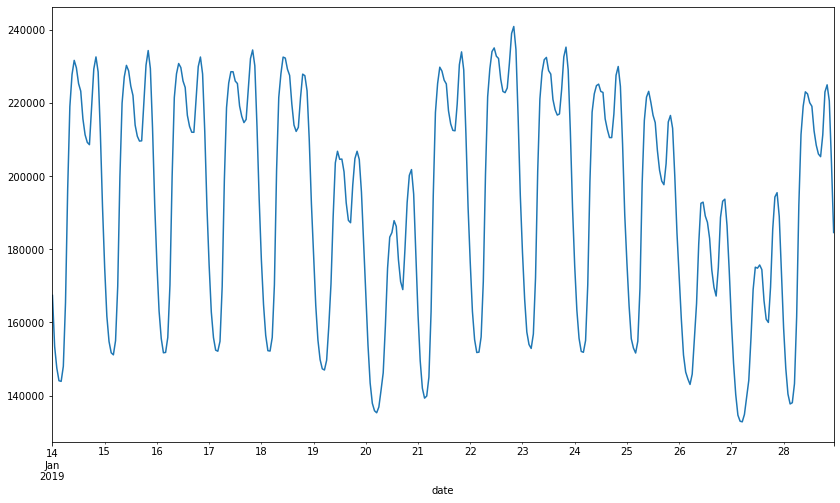

In [23]:
energy_demand_hourly_test_week['value'].plot(figsize=(14,8))

Podemos ver claramente un comportamiento biestacional en el que los patrones de demanda de energía se repiten día a día y a lo largo de la semana. Podemos ver cómo de lunes a viernes (días laborables) el patrón de demanda y sus valores son casi los mismos, para luego decaer en sábado y domingo (días no laborables), siendo el domingo el día de mayor demanda energética.

En cuanto a la demanda dentro de un mismo día, veamos la distribución de la demanda un lunes (2019-01-14).

In [24]:
energy_demand_hourly_test_day = energy_demand_hourly.loc[
    energy_demand_hourly['date'].isin([
        '2019-01-14'
    ])
]
energy_demand_hourly_test_day.head(2)

,date,hour,value,weekday,working_day
44136,2019-01-14,0,167382.0,0,1
44137,2019-01-14,1,153434.0,0,1


In [25]:
energy_demand_hourly_test_day['date'] = pd.to_datetime(energy_demand_hourly_test_day.date) + pd.to_timedelta(energy_demand_hourly_test_day.hour, unit='h')
del energy_demand_hourly_test_day['hour']
energy_demand_hourly_test_day.head(2)

/tmp/ipykernel_24774/215573048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_demand_hourly_test_day['date'] = pd.to_datetime(energy_demand_hourly_test_day.date) + pd.to_timedelta(energy_demand_hourly_test_day.hour, unit='h')


,date,value,weekday,working_day
44136,2019-01-14 00:00:00,167382.0,0,1
44137,2019-01-14 01:00:00,153434.0,0,1


In [26]:
energy_demand_hourly_test_day.set_index("date", inplace=True)
energy_demand_hourly_test_day.head(2)

,value,weekday,working_day
date,,,
2019-01-14 00:00:00,167382.0,0,1
2019-01-14 01:00:00,153434.0,0,1


In [27]:
energy_demand_hourly_test_day = energy_demand_hourly_test_day.resample('H').first()
energy_demand_hourly_test_day.index.freq

<Hour>

In [28]:
energy_demand_hourly_test_day.index

DatetimeIndex(['2019-01-14 00:00:00', '2019-01-14 01:00:00',
               '2019-01-14 02:00:00', '2019-01-14 03:00:00',
               '2019-01-14 04:00:00', '2019-01-14 05:00:00',
               '2019-01-14 06:00:00', '2019-01-14 07:00:00',
               '2019-01-14 08:00:00', '2019-01-14 09:00:00',
               '2019-01-14 10:00:00', '2019-01-14 11:00:00',
               '2019-01-14 12:00:00', '2019-01-14 13:00:00',
               '2019-01-14 14:00:00', '2019-01-14 15:00:00',
               '2019-01-14 16:00:00', '2019-01-14 17:00:00',
               '2019-01-14 18:00:00', '2019-01-14 19:00:00',
               '2019-01-14 20:00:00', '2019-01-14 21:00:00',
               '2019-01-14 22:00:00', '2019-01-14 23:00:00'],
              dtype='datetime64[ns]', name='date', freq='H')

<AxesSubplot:xlabel='date'>

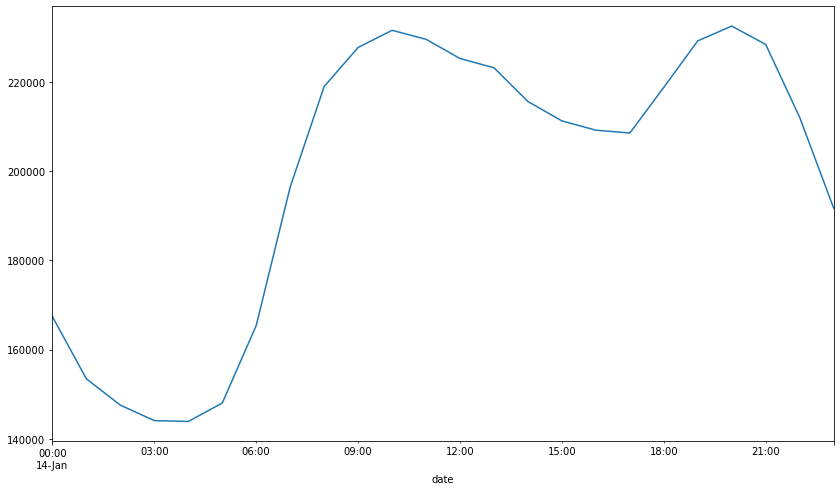

In [29]:
energy_demand_hourly_test_day['value'].plot(figsize=(14,8))

Podemos ver cómo el mínimo de demanda energética se produce entre las 3-4 de la mañana para subir hasta alcanzar un máximo a las 10am por el inicio de la jornada laboral y tareas domésticas en muchos hogares, decaer ligeramente a las 17h coincidiendo con el fin de la jornada laboral, y terminar alcanzando un máximo a las 20h. Este último máximo se corresponde con que en muchos hogares se realizan tareas domésticas como limpieza, cocina y calefacción.

Por último, vamos a ver cómo afectan los festivos a la demanda energética semanal. La Semana Santa es bastante ilustrativa, ya que siempre hay dos días laborables (jueves y viernes) festivos.

In [30]:
energy_demand_hourly_test_festive = energy_demand_hourly.loc[
    energy_demand_hourly['date'].isin([
        '2019-04-15', '2019-04-16', '2019-04-17', '2019-04-18', 
        '2019-04-19', '2019-04-20', '2019-04-21', '2019-04-22',
        '2019-04-23', '2019-04-24', '2019-04-25', '2019-04-26',
        '2019-04-27', '2019-04-28', '2019-04-29'
    ])
]
energy_demand_hourly_test_festive

,date,hour,value,weekday,working_day
46319,2019-04-15,0,145400.0,0,1
46320,2019-04-15,1,136503.0,0,1
46321,2019-04-15,2,130049.0,0,1
46322,2019-04-15,3,128216.0,0,1
46323,2019-04-15,4,127619.0,0,1
...,...,...,...,...,...
46674,2019-04-29,19,164601.0,0,1
46675,2019-04-29,20,169618.0,0,1
46676,2019-04-29,21,181597.0,0,1
46677,2019-04-29,22,172656.0,0,1


In [31]:
energy_demand_hourly_test_festive['date'] = pd.to_datetime(energy_demand_hourly_test_festive.date) + pd.to_timedelta(energy_demand_hourly_test_festive.hour, unit='h')
del energy_demand_hourly_test_festive['hour']
energy_demand_hourly_test_festive.head(2)

/tmp/ipykernel_24774/1257310140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_demand_hourly_test_festive['date'] = pd.to_datetime(energy_demand_hourly_test_festive.date) + pd.to_timedelta(energy_demand_hourly_test_festive.hour, unit='h')


,date,value,weekday,working_day
46319,2019-04-15 00:00:00,145400.0,0,1
46320,2019-04-15 01:00:00,136503.0,0,1


In [32]:
energy_demand_hourly_test_festive.set_index("date", inplace=True)
energy_demand_hourly_test_festive.head(2)

,value,weekday,working_day
date,,,
2019-04-15 00:00:00,145400.0,0,1
2019-04-15 01:00:00,136503.0,0,1


In [33]:
energy_demand_hourly_test_festive = energy_demand_hourly_test_festive.resample('H').first()
energy_demand_hourly_test_festive.index.freq

<Hour>

In [34]:
energy_demand_hourly_test_festive.index

DatetimeIndex(['2019-04-15 00:00:00', '2019-04-15 01:00:00',
               '2019-04-15 02:00:00', '2019-04-15 03:00:00',
               '2019-04-15 04:00:00', '2019-04-15 05:00:00',
               '2019-04-15 06:00:00', '2019-04-15 07:00:00',
               '2019-04-15 08:00:00', '2019-04-15 09:00:00',
               ...
               '2019-04-29 14:00:00', '2019-04-29 15:00:00',
               '2019-04-29 16:00:00', '2019-04-29 17:00:00',
               '2019-04-29 18:00:00', '2019-04-29 19:00:00',
               '2019-04-29 20:00:00', '2019-04-29 21:00:00',
               '2019-04-29 22:00:00', '2019-04-29 23:00:00'],
              dtype='datetime64[ns]', name='date', length=360, freq='H')

<AxesSubplot:xlabel='date'>

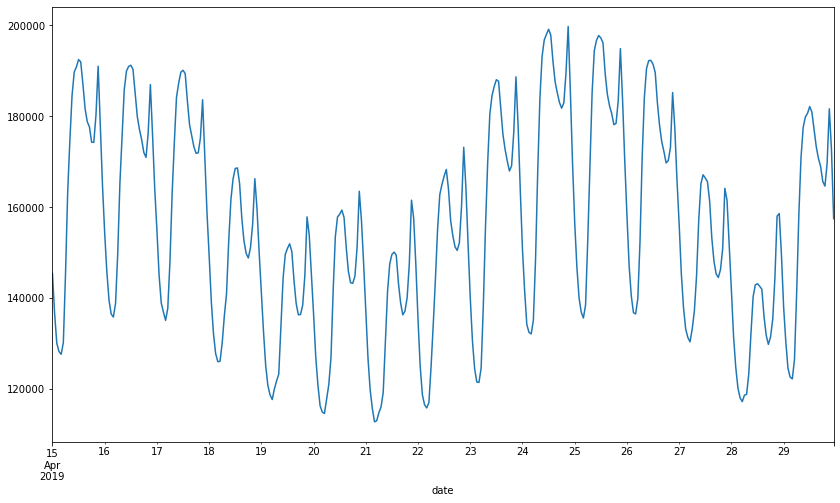

In [35]:
energy_demand_hourly_test_festive['value'].plot(figsize=(14,8))

Podemos ver cómo de lunes a miércoles el consumo es casi el mismo, para luego decaer durante 4 días (jueves, viernes, sábado y domingo) por ser festivos, para luego volver a aumentar durante la semana la siguiente semana a patrones habituales: 5 días de demanda elevada, 2 días de demanda reducida.

Vamos a analizar un mes sin festivos (septiembre 2019) para ver qué tipo de serie es en cuanto a estacionariedad y cómo se correlacionan sus valores entre sí.

In [56]:
# NOTA: es correcto usar 30 días para una serie horaria? deberían ser 30 días empezando por un lunes?

In [63]:
energy_demand_hourly_test_month = energy_demand_hourly.loc[
    energy_demand_hourly['date'].isin([
        '2019-09-01', '2019-09-02', '2019-09-03', '2019-09-04', '2019-09-05', 
        '2019-09-06', '2019-09-07', '2019-09-08', '2019-09-09', '2019-09-10', 
        '2019-09-11', '2019-09-12', '2019-09-13', '2019-09-14', '2019-09-15',
        '2019-09-16', '2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20',
        '2019-09-21', '2019-09-22', '2019-09-23', '2019-09-24', '2019-09-25',
        '2019-09-26', '2019-09-27', '2019-09-28', '2019-09-29', '2019-09-30',
    ])
]
energy_demand_hourly_test_month

,date,hour,value,weekday,working_day
49655,2019-09-01,0,154000.0,6,1
49656,2019-09-01,1,144287.0,6,1
49657,2019-09-01,2,137042.0,6,1
49658,2019-09-01,3,133115.0,6,1
49659,2019-09-01,4,129817.0,6,1
...,...,...,...,...,...
50370,2019-09-30,19,184544.0,0,1
50371,2019-09-30,20,195517.0,0,1
50372,2019-09-30,21,192468.0,0,1
50373,2019-09-30,22,173324.0,0,1


In [64]:
energy_demand_hourly_test_month['date'] = pd.to_datetime(energy_demand_hourly_test_month.date) + pd.to_timedelta(energy_demand_hourly_test_month.hour, unit='h')
del energy_demand_hourly_test_month['hour']
energy_demand_hourly_test_month

/tmp/ipykernel_24774/2858391992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_demand_hourly_test_month['date'] = pd.to_datetime(energy_demand_hourly_test_month.date) + pd.to_timedelta(energy_demand_hourly_test_month.hour, unit='h')


,date,value,weekday,working_day
49655,2019-09-01 00:00:00,154000.0,6,1
49656,2019-09-01 01:00:00,144287.0,6,1
49657,2019-09-01 02:00:00,137042.0,6,1
49658,2019-09-01 03:00:00,133115.0,6,1
49659,2019-09-01 04:00:00,129817.0,6,1
...,...,...,...,...
50370,2019-09-30 19:00:00,184544.0,0,1
50371,2019-09-30 20:00:00,195517.0,0,1
50372,2019-09-30 21:00:00,192468.0,0,1
50373,2019-09-30 22:00:00,173324.0,0,1


In [65]:
energy_demand_hourly_test_month.set_index("date", inplace=True)
energy_demand_hourly_test_month.head(2)

,value,weekday,working_day
date,,,
2019-09-01 00:00:00,154000.0,6,1
2019-09-01 01:00:00,144287.0,6,1


In [66]:
energy_demand_hourly_test_month = energy_demand_hourly_test_month.resample('H').first()
energy_demand_hourly_test_month.index.freq

<Hour>

In [67]:
energy_demand_hourly_test_month.index

DatetimeIndex(['2019-09-01 00:00:00', '2019-09-01 01:00:00',
               '2019-09-01 02:00:00', '2019-09-01 03:00:00',
               '2019-09-01 04:00:00', '2019-09-01 05:00:00',
               '2019-09-01 06:00:00', '2019-09-01 07:00:00',
               '2019-09-01 08:00:00', '2019-09-01 09:00:00',
               ...
               '2019-09-30 14:00:00', '2019-09-30 15:00:00',
               '2019-09-30 16:00:00', '2019-09-30 17:00:00',
               '2019-09-30 18:00:00', '2019-09-30 19:00:00',
               '2019-09-30 20:00:00', '2019-09-30 21:00:00',
               '2019-09-30 22:00:00', '2019-09-30 23:00:00'],
              dtype='datetime64[ns]', name='date', length=720, freq='H')

<AxesSubplot:xlabel='date'>

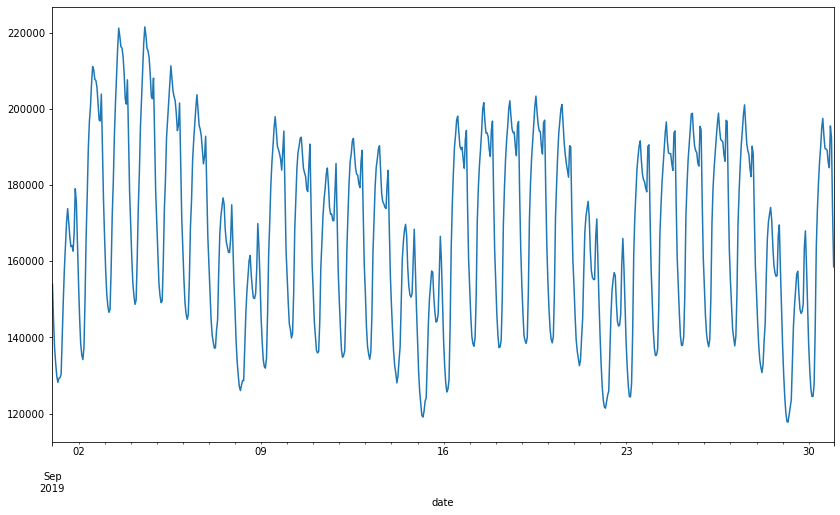

In [68]:
energy_demand_hourly_test_month['value'].plot(figsize=(14,8))

In [71]:
adfuller_test(energy_demand_hourly_test_month['value'])

ADF Tesr Statistic: -1.968885244606277
p-value: 0.30038021521938085
Lags Used: 20
Number of Observations Used: 699
Conclusion: weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


Podemos ver que la serie tampoco es estacionaria si se atiende a la distribución de la demanda por horas. Vamos a ver ahora cómo se correlacionan los valores entre sí.

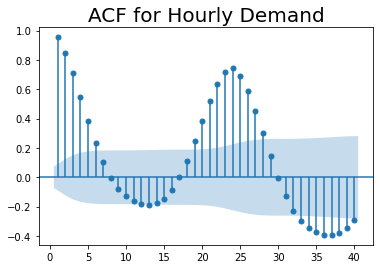

In [72]:
sgt.plot_acf(energy_demand_hourly_test_month['value'], zero = False, lags = 40)
plt.title("ACF for Hourly Demand", size = 20)
plt.show()

/home/berni/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


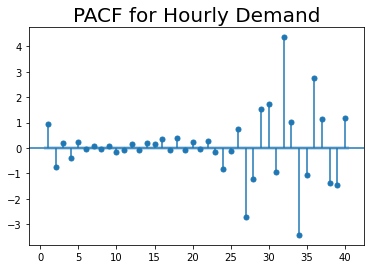

In [73]:
sgt.plot_pacf(energy_demand_hourly_test_month['value'], zero = False, lags = 40)
plt.title("PACF for Hourly Demand", size = 20)
plt.show()

Podemos ver en la gráfica ACF cómo hay una fuerte dependencia de los 6 primeros valores, para luego tener una serie de valores estadísticamente no significativos y volver a tener valores significativos, aunque de menor importancia que los 3 primeros valores. Destaca cómo los valores vuelven a ser significativos en el valor 24, como corresponde a una serie de con un período de 24h.

Por otro lado, en PACF vemos que parece ser que todos los valores son estadísticamente significativos. La correlación es más importante en los 2 primeros valores, decae y vuelve a crecer mucho en valores bastante lejanos (a partir del valor 25) lo que nos puede indicar la presencia de ruido.

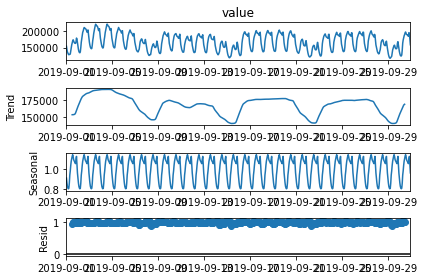

In [75]:
result = seasonal_decompose(energy_demand_hourly_test_month['value'], model='multiplicative', period=24)
result.plot()
plt.show()

In [76]:
# pasos a seguir:
## histograma donde se sume las temperaturas por meses para confirmar los meses de mayor consumo
### hacer prueba de quitar 2020 y 2021 por ser años anómalos? solo 2020?

## análisis por día
### incluir temperatura (semana, mes, año)?¿


## Holt-Winters de prueba